In [18]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


In [19]:
# Load the dataset
url = 'https://raw.githubusercontent.com/fenago/datasets/main/mushrooms.csv'
df = pd.read_csv(url)


In [20]:
# Display a sample of the dataset
df.sample(5)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
44,e,x,s,y,t,a,f,c,b,w,...,s,w,w,p,w,o,p,k,n,m
529,e,f,y,y,t,a,f,c,b,w,...,y,w,w,p,w,o,p,n,y,p
7428,p,k,y,n,f,y,f,c,n,b,...,k,p,p,p,w,o,e,w,v,d
4670,p,f,f,y,f,f,f,c,b,p,...,k,p,n,p,w,o,l,h,y,g
1597,e,x,s,g,f,n,f,w,b,p,...,s,w,w,p,w,o,e,k,a,g


In [21]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)


In [22]:
# Define features and labels
X = df_encoded.drop('class_p', axis=1)  # 'class_p' is the encoded target column for poisonous mushrooms
y = df_encoded['class_p']


In [23]:

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [24]:
# Set seed for reproducibility
tf.random.set_seed(42)


In [25]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

# Compile the model
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.02),
    metrics=['accuracy']
)


In [26]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))


Epoch 1/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9447 - loss: 0.1152 - val_accuracy: 0.9994 - val_loss: 0.0019
Epoch 2/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9951 - loss: 0.0299 - val_accuracy: 1.0000 - val_loss: 4.2071e-04
Epoch 3/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9991 - loss: 0.0051 - val_accuracy: 1.0000 - val_loss: 2.1659e-06
Epoch 4/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.2732e-06 - val_accuracy: 1.0000 - val_loss: 1.4244e-06
Epoch 5/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.5386e-07 - val_accuracy: 1.0000 - val_loss: 1.0723e-06
Epoch 6/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 6.3260e-07 - val_accuracy: 1.0000 - val_loss: 8.3447e-07
Epoch 7/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.8421e-07 - val_accuracy: 1.0000 - val_loss: 6.6443e-07
Epoch 8/100
204/204 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - ac

In [27]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print('Accuracy:', accuracy)


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 1.0000 - loss: 1.9405e-11
Accuracy: 1.0


In [28]:
# Make predictions
predictions = model.predict(X_test)

51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [29]:
import matplotlib.pyplot as plt

# Create a chart to visualize the model's training history (accuracy and loss over epochs)

# Plot accuracy
def plot_accuracy_and_loss(history):
    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Assuming history object is already available from the model training
# plot_accuracy_and_loss(history) # Uncomment this line in an environment where the model is trained



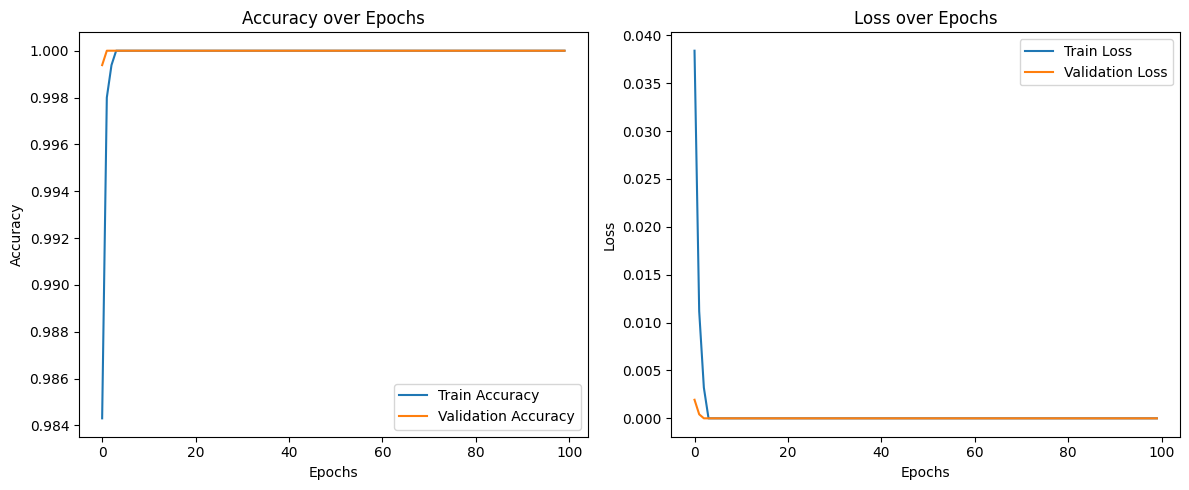

In [30]:
plot_accuracy_and_loss(history)
